# Linear Discriminant Analysis (LDA)

### Goal
Feature Reduction. The goal is to project a dataset onto a lower-dimensional space with good class- separability.

### PCA vs LDA
	1) PCA: finding the component axes that maximize the variance of our data
    2) LDA additionally interested in the axes that maximize the separation between multiple classes.
    3) LDA is supervised learning(we have y labels), PCA is unsupervised!

### Approach
	1) Calculate within-class scatter matrix (Sw)
    2) Calculate between class scatter matrix (Sb)
    3) Calculate Eigenvalues of Sw(inverse)Sb
    4) Sort the e-vec according to their e-values in decreasing order.
    5) Choose the k e-vec and that will be the new k dimensions (linear discriminants)
    6) Transform the original n dimensional data points into k dimensions (Projections with dot product)

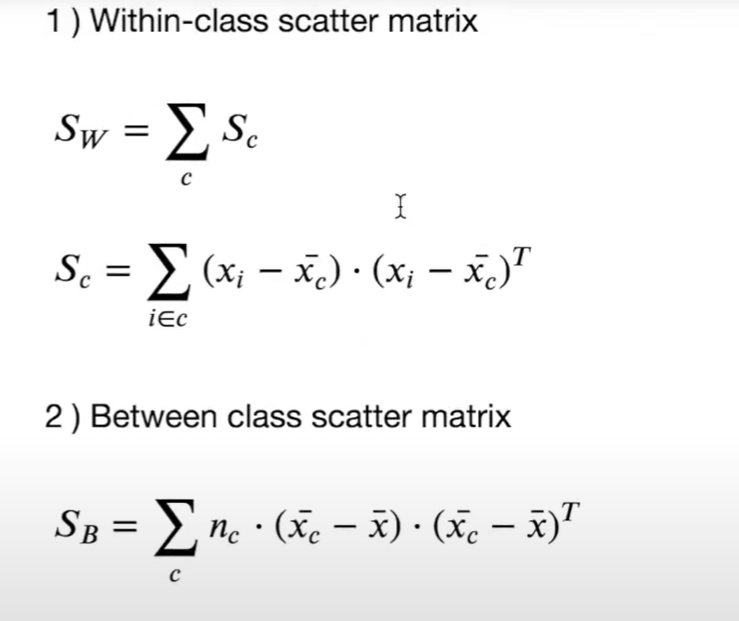

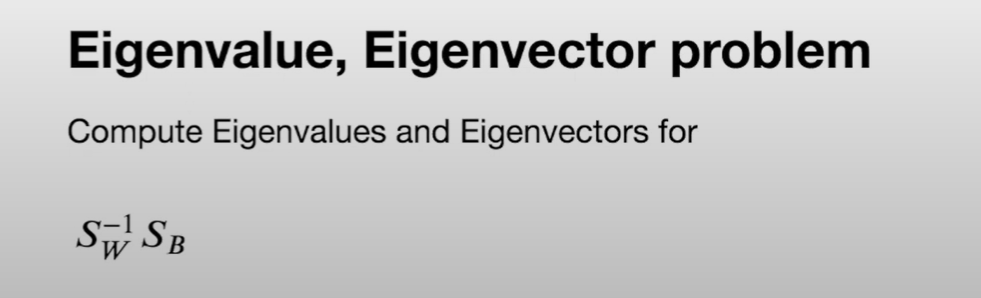

In [2]:
import numpy as np

class my_LDA:
    
    def __init__(self,n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        #S_W, S_B
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features,n_features)) #(4,4)
        S_B = np.zeros((n_features,n_features)) #(4,4)
        
        for c in class_labels:
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c,4) = (4,4)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            
            n_c = X_c.shape[0]
            # (4,1) * (1,4) = (4,4)
            mean_diff = (mean_c - mean_overall).reshape(n_features,1) #(4,1)
            S_B += n_c*(mean_diff).dot(mean_diff.T)
     
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        index = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[index]
        self.linear_discriminants = eigenvectors[0:self.n_components]
    
    def transform(self,X):
        return np.dot(X, self.linear_discriminants.T)

In [3]:
#Importing libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#Load dataset
data = datasets.load_iris()
X = data.data
y = data.target

In [5]:
lda = my_LDA(2)
lda.fit(X,y)
X_projected = lda.transform(X)

In [6]:
print('Shape of X', X.shape)
print('Shape of transform data', X_projected.shape)

Shape of X (150, 4)
Shape of transform data (150, 2)


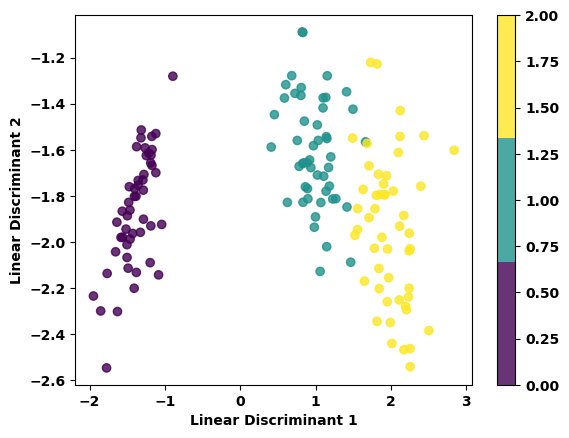

In [7]:
plt.scatter(X_projected[:,0], X_projected[:,1], c =y, alpha=0.8, cmap = plt.cm.get_cmap('viridis',3))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()